DATA SCIENCE PROJECT-- individual planning  
Name: Chloe Guo  
Student Number: 77262509  
Data set: players.csv, sessions.csv


Data description
1.players.csv
observations:196
variables:7  
Contains demographic and behavioral information about each unique player.  

Variable Names(Type) and description:
experience(Categorical),player's self-reported experience level.
subscribe(Boolean),whether the player subscribed to the game-related newsletter.
hashedEmail(String),encrypted identifier for each player, used ro link with sessions.csv.
played_hours(Numeric),total hours the player has spent in game.
name(Sttring),player's chosen display name.
gender(Categorical),player's gender
Age(Numeric), player's age in years.

Summary statistics:  
Mean Age: 21.14 years  
Mean played hours: 5.85 hours  

2.sessions.csv  
observation: 1535  
variables: 5  
Contains information about individual gameplay sessions linked to players through their hashed email.  

Variable Names(Type) and description:  
hashedEmail(String), unique identifier linking each session to a player in players.csv  
start_time(String), start time of the play session(day/month/year hour:minute)  
end_time(String),end time of the play session.  
original_start_time(Numeric), unix timestamp representing start time.  
original_end_time(Numeric), unix timestamp representing end time.  

Summary statistics:  
Average sessions per player: 7.83  

Potential issues and data quality concerns:  
1.missing age and end_time values.  
2.time data needs to be converted to a consistent format for analysis.  

Questions:  
Broad question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types  
Specific question: Can a player's age, gender, average session length and number of sessions predict whether they will subscribe to the game newsletter?  
Response variable: subscribe  
Explanatory variables: hashedEmail, age, gender,played_hours, original_start_time, original_end_time  

The dataset links player demographics and gameplay behaviour to newsletter subscription status. The response variable, subscribe, indicates whether a player subscribed, while explanatory variables such as age, gender, and played_hours capture demographic and engagement information. Session start and end times can be used to calculate session durations, providing additional insight into player behaviour.

For logistic regression, categorical variables like gender will be encoded, and continuous variables such as age and played_hours may be scaled. Missing values will be addressed, and irrelevant identifiers, like hashedEmail, will be excluded. Once processed, the data can be used to model the probability of subscription and identify which player characteristics and engagement patterns are most predictive. This preparation ensures that both demographic and behavioural factors are appropriately represented in the analysis.


In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players<-read_csv("players (1).csv")
sessions<-read_csv("sessions (1).csv")

head(players)
head(sessions)

summary(players)
summary(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [3]:
sessions<-sessions|>
mutate(session_length=(original_end_time-original_start_time))
sessions_means<-sessions|>
summarise(mean_session_length=mean(session_length,na.rm=TRUE))
sessions_means

players_numeric <- players|>
  select(played_hours, Age)
players_means <- players_numeric|>
  summarise(across(everything(), mean, na.rm = TRUE))
players_means

mean_session_length
<dbl>
2909328


Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(everything(), mean, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


In [4]:
players <- players|>
  mutate(hashedEmail = as.character(hashedEmail))
sessions <- sessions|>
  mutate(hashedEmail = as.character(hashedEmail))

sessions_summary <- sessions |>
  group_by(hashedEmail) |>
  summarise(
    total_sessions = n(),
    avg_session_length = mean(session_length, na.rm = TRUE))
players_combined <- players |>
  left_join(sessions_summary, by = "hashedEmail")

Warning message:
“Removed 71 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


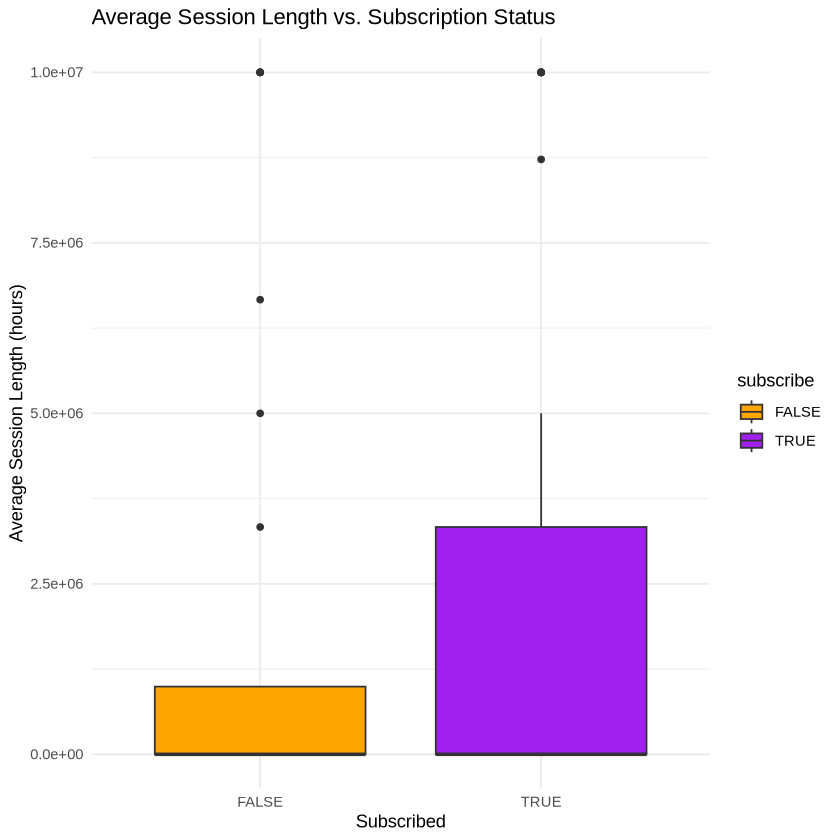

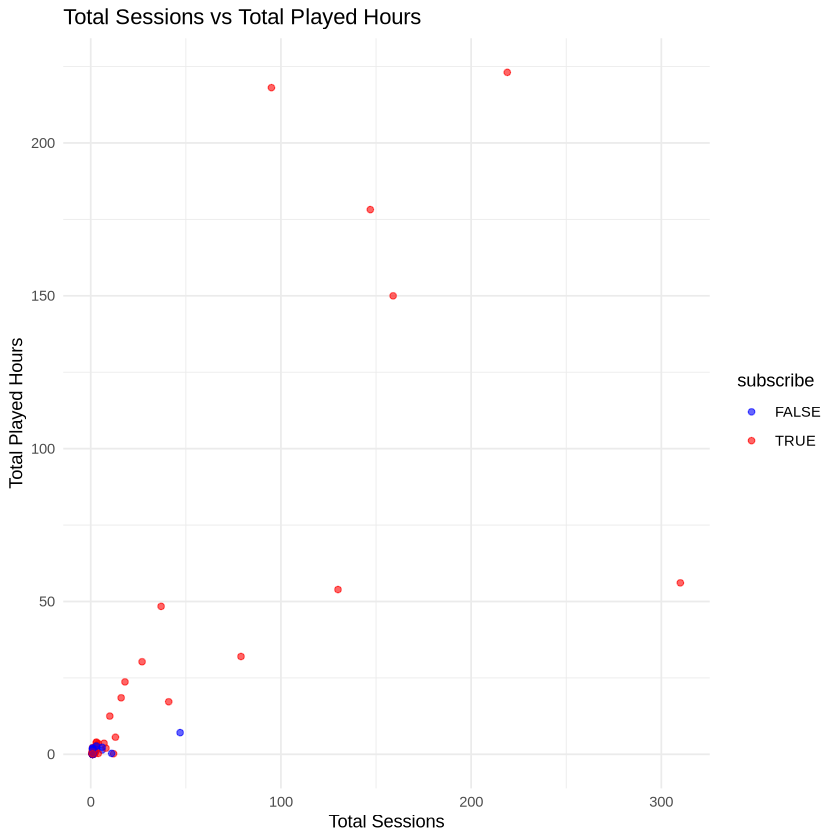

In [5]:
# Average session length by subscription
session_length_plot<-ggplot(players_combined, aes(x = subscribe, y = avg_session_length, fill = subscribe)) +
  geom_boxplot() +
  labs(title = "Average Session Length vs. Subscription Status",
       x = "Subscribed",
       y = "Average Session Length (hours)") +
  theme_minimal() +
  scale_fill_manual(values = c("orange", "purple"))

# Total sessions vs played_hours
total_session_plot<-ggplot(players_combined, aes(x = total_sessions, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.6) +
  labs(title = "Total Sessions vs Total Played Hours",
       x = "Total Sessions",
       y = "Total Played Hours") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red"))

session_length_plot
total_session_plot


INSIGHTS:  
1.Average Session Length vs. Subscription  
Players who subscribe tend to have longer average session lengths than non-subscribers.
Implication: Average session length is likely an important predictor of newsletter subscription.

2.Total Sessions vs. Played Hours  
Players with more total sessions and higher total hours played are more likely to subscribe.
Less engaged players (fewer sessions and hours) are mostly non-subscribers.
Implication: Both total sessions and total hours are reasonable indicators of subscription likely, reflecting overall engagement.

Method and Plan:  
I will use regression to model the probability of newsletter subscription, as the response variable is binary. Assumptions include linearity of the logit for continuous predictors, independence of observations, and no perfect multicollinearity. Limitations include sensitivity to outliers and non-linear relationships. Model performance will be assessed via accuracy, AUC, and cross-validation. The dataset will be split into 70% training and 30% testing, with categorical variables encoded and continuous variables scaled. Missing values will be handled, and irrelevant identifiers excluded. Cross-validation on the training set will guide model selection and avoid overfitting.